<p style="font-family: 'Arial', sans-serif; font-size: 3rem; color: #6a1b9a; text-align: center; margin: 0; 
           text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1); background-color: #f5f5f5; padding: 10px; 
           border-radius: 10px; border: 4px solid #6a5acd; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.1); width: 97%;">
    <span style="font-weight: bold; color: #6a1b9a; animation: pulse 2s infinite;"></span>COMPX310-2025 Lab 4 <br> ROC Curves and Model Evaluation (Wisconsin Breast Cancer)
</p>

<div align="center">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwkadoBZLAFafSH9pQuwSx3EQTi8AwowI7TA&s" width="500" height="300">
</div>

## Lab Information
- **Due Date:** October 19, 2025
- **Weight:** 3% of total course grade
- **Platform:** Google Colab, Kaggle, or VSCode (with Jupyter extension)

---

## Student Information
**Please fill in your details:**
- **Name:** Guo Zimo 
- **Student ID:** 20233006327
- **Partner's Name (if applicable):** [Partner's Name]
- **Partner's Student ID (if applicable):** [Partner's ID]

---

## Lab Overview

### Learning Objectives
In this lab, you will:
1. Understand how to prepare and interpret ROC curves
2. Evaluate classifiers using multiple metrics (accuracy, AUC, precision, recall)
3. Apply cross-validation for robust model evaluation
4. Compare model performance on different test datasets
5. Understand why models may perform differently on different datasets

### What is an ROC Curve?
- **ROC** stands for Receiver Operating Characteristic
- It plots **True Positive Rate (TPR)** vs **False Positive Rate (FPR)** at various threshold settings
- **AUC (Area Under Curve)** measures the overall performance - higher is better
- A perfect classifier has AUC = 1.0, random guessing has AUC = 0.5

### Dataset
We'll use the Wisconsin Breast Cancer dataset to classify tumors as benign or malignant.

---

<div align="center">
  <img src="https://i-blog.csdnimg.cn/blog_migrate/c664f6e8d228443c41717bbbbb8eabe9.png" width="600" height="500">
</div>

## Part A: ROC Curves and Cross-Validation Evaluation [2 marks]

### Task Overview
1. Load and prepare the breast cancer dataset
2. Use 10-fold cross-validation to evaluate two classifiers:
   - **SGDClassifier** (Stochastic Gradient Descent)
   - **GaussianNB** (Gaussian Naive Bayes)
3. Generate ROC curves and calculate AUC values
4. Compare classifiers using multiple metrics

### Task 1: Import Libraries and Load Data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (roc_curve, auc, classification_report, 
                            confusion_matrix, accuracy_score)

print("✓ All libraries imported successfully!")

# Set your student ID for reproducibility
# COMPLETE: If working in pairs, use the larger student ID
STUDENT_ID = 6327 # COMPLETE: Enter your student ID

print(f"✓ Random seed set to: {STUDENT_ID}")

✓ All libraries imported successfully!
✓ Random seed set to: 6327


In [66]:
# COMPLETE: Load the dataset
df = pd.read_csv("breast-cancer-wisconsin.csv")

print("✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head)
# COMPLETE: Display first 5 rows using .head()

✓ Dataset loaded successfully!
Dataset shape: (699, 11)

First 5 rows:
<bound method NDFrame.head of           id  thickness  size  shape  adhesion  single nuclei  chromatin  \
0    1000025          5     1      1         1       2      1          3   
1    1002945          5     4      4         5       7     10          3   
2    1015425          3     1      1         1       2      2          3   
3    1016277          6     8      8         1       3      4          3   
4    1017023          4     1      1         3       2      1          3   
..       ...        ...   ...    ...       ...     ...    ...        ...   
694   776715          3     1      1         1       3      2          1   
695   841769          2     1      1         1       2      1          1   
696   888820          5    10     10         3       7      3          8   
697   897471          4     8      6         4       3      4         10   
698   897471          4     8      8         5       4      5  

### Task 2: Data Cleaning and Preparation

**What to do:**
1. Check for missing values
2. Handle missing values appropriately
3. Remove the 'ID' column (not useful for prediction)
4. Separate features (X) and target (y)

In [67]:
# Check dataset information
print("Dataset Information:")
# print(df.info)

print("\nMissing values per column:")
df = df.replace("#NUM!", pd.NA, inplace=False)
print(df.isnull().sum())

print(f"\nTarget variable unique values: {df['class'].unique()}")
print(f"Class distribution:\n{df['class'].value_counts()}")

Dataset Information:

Missing values per column:
id            0
thickness     0
size          0
shape         0
adhesion      0
single        0
nuclei       16
chromatin     0
nucleoli      0
mitosis       0
class         0
dtype: int64

Target variable unique values: [0 1]
Class distribution:
class
0    458
1    241
Name: count, dtype: int64


In [68]:
# Handle missing values
# COMPLETE: Replace '?' with NaN if present, then drop rows with missing values
df = df.replace(pd.NA, "?")
df = df.drop("nuclei", axis=1)

print(f"✓ Data cleaned! Shape after cleaning: {df.shape}")

✓ Data cleaned! Shape after cleaning: (699, 10)


In [69]:
# Prepare features and target
df = df.drop("id", axis=1)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")

Features shape: (699, 8)
Target shape: (699,)

Feature columns: ['thickness', 'size', 'shape', 'adhesion', 'single', 'chromatin', 'nucleoli', 'mitosis']


### Task 3: Train-Test Split

Split the data into 80% training and 20% testing sets.
**Important:** Use `stratify=y` to maintain class proportions in both sets.

In [70]:
# COMPLETE: Split the data using train_test_split
# Parameters: test_size=0.2, random_state=STUDENT_ID, stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=STUDENT_ID)

print("✓ Data split completed!")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training class distribution:\n{y_train.value_counts()}")

✓ Data split completed!
Training set size: 559
Test set size: 140
Training class distribution:
class
0    366
1    193
Name: count, dtype: int64


### Task 4a: 10-Fold Cross-Validation Predictions

Use `cross_val_predict` to generate predictions for both classifiers:
- **SGDClassifier**: Use `method='decision_function'` to get decision scores
- **GaussianNB**: Use `method='predict_proba'` to get probability scores

**Why Cross-Validation?**
Cross-validation gives us a more reliable estimate of model performance by testing on multiple different subsets of the data.

In [71]:
# Initialize classifiers
# COMPLETE: Create SGDClassifier with random_state=STUDENT_ID, loss='log_loss'
sgd_clf = SGDClassifier(random_state=STUDENT_ID, loss="log_loss")

# COMPLETE: Create GaussianNB classifier
nb_clf = GaussianNB()

print("✓ Classifiers initialized!")

✓ Classifiers initialized!


In [72]:
# COMPLETE: Get cross-validation predictions for SGDClassifier
# Hint: Use cross_val_predict with cv=10, method='decision_function'

sgd_y_scores = cross_val_predict(sgd_clf, X=X, y=y, cv=10, method="decision_function")

print(f"✓ SGD cross-validation scores obtained: {sgd_y_scores.shape}")

✓ SGD cross-validation scores obtained: (699,)


In [73]:
# COMPLETE: Get cross-validation predictions for GaussianNB
# Hint: Use cross_val_predict with cv=10, method='predict_proba'
# Note: predict_proba returns 2 columns, use the second column [:, 1]

nb_y_scores_proba = cross_val_predict(nb_clf, X=X, y=y, cv=10, method="predict_proba") # COMPLETE: Use cross_val_predict with NB classifier
nb_y_scores = nb_y_scores_proba[:, 1] # COMPLETE: Extract second column for positive class probabilities

print(f"✓ Naive Bayes cross-validation scores obtained: {nb_y_scores.shape}")

✓ Naive Bayes cross-validation scores obtained: (699,)


### Task 4b: Plot ROC Curves with AUC Values

**Requirements:**
1. Calculate ROC curve (FPR, TPR) for both classifiers
2. Calculate AUC (Area Under Curve) for both
3. Plot both ROC curves on the same figure
4. Add a diagonal line from (0,0) to (1,1) representing random guessing
5. Include legend with classifier names and AUC values
6. Add descriptive title and axis labels

In [74]:
# COMPLETE: Calculate ROC curve for SGDClassifier
# Hint: Use roc_curve(Actual, predicted)

sgd_fpr, sgd_tpr, sgd_thresholds = roc_curve(y, sgd_y_scores) # COMPLETE: Calculate ROC curve for SGD
sgd_auc = auc(sgd_fpr, sgd_tpr) # COMPLETE: Calculate AUC using sgd_fpr and sgd_tpr

print(f"SGD AUC: {sgd_auc:.4f}")

SGD AUC: 0.9907


In [75]:
# COMPLETE: Calculate ROC curve for GaussianNB
# Hint: Use roc_curve(Actual, predicted)

nb_fpr, nb_tpr, nb_thresholds = roc_curve(y, nb_y_scores) # COMPLETE: Calculate ROC curve for NB
nb_auc = auc(nb_fpr, nb_tpr) # COMPLETE: Calculate AUC using nb_fpr and nb_tpr

print(f"Naive Bayes AUC: {nb_auc:.4f}")

Naive Bayes AUC: 0.9829


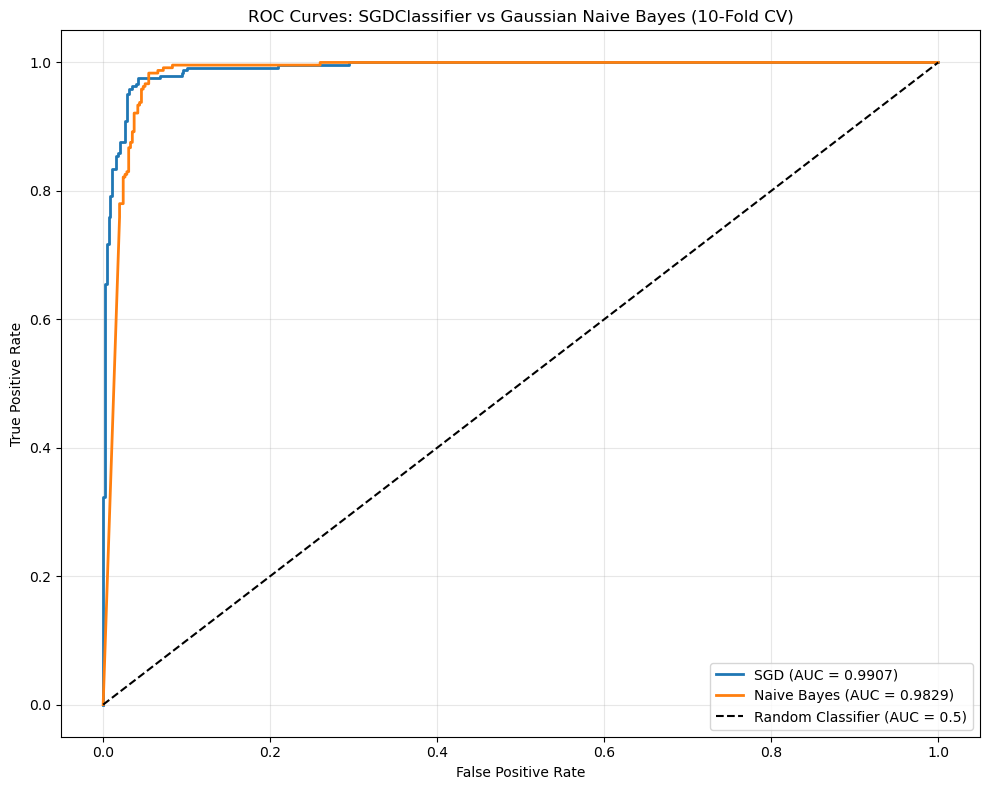

✓ ROC curves plotted!


In [76]:
# COMPLETE: Plot ROC curves for both classifiers

plt.figure(figsize=(10, 8))

# COMPLETE: Plot SGD ROC curve
# Hint: plt.plot(sgd_fpr, sgd_tpr, label=f'SGD (AUC = {sgd_auc:.4f})', linewidth=2)
plt.plot(sgd_fpr, sgd_tpr, label=f'SGD (AUC = {sgd_auc:.4f})', linewidth=2)

# COMPLETE: Plot Naive Bayes ROC curve
# Hint: plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.4f})', linewidth=2)
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.4f})', linewidth=2)

# COMPLETE: Plot diagonal line (random classifier)
# Hint: plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: SGDClassifier vs Gaussian Naive Bayes (10-Fold CV)')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ ROC curves plotted!")

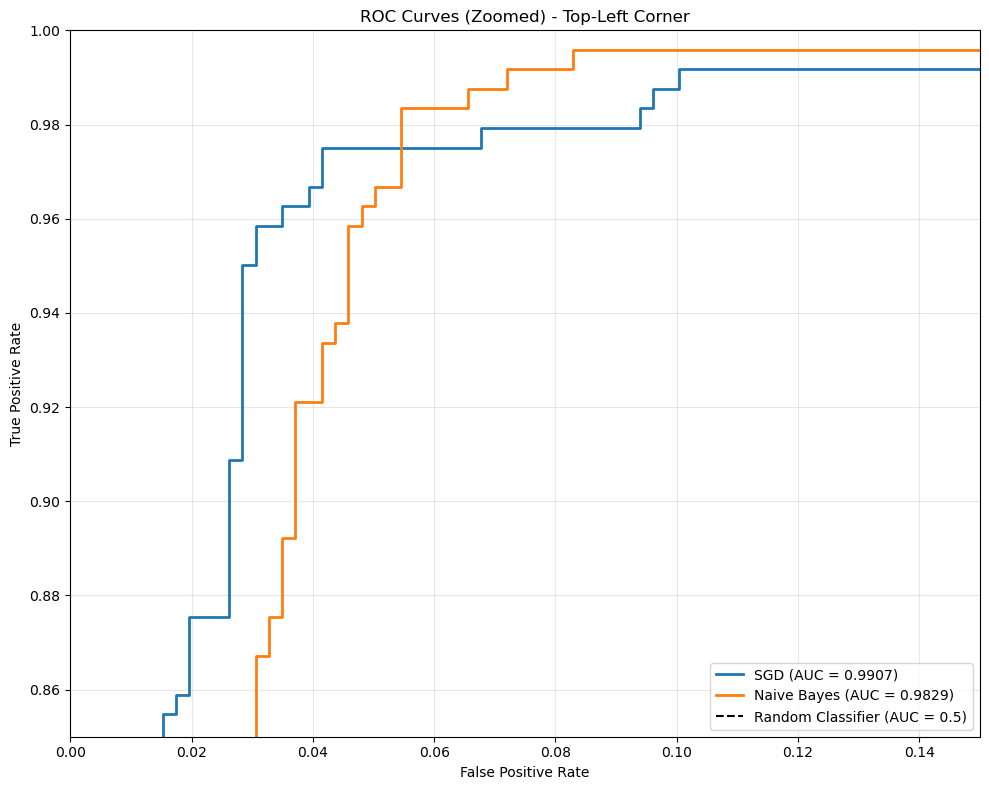

In [77]:
"""
### Optional: Zoomed ROC Curve (Top-Left Corner)

Sometimes ROC curves are very close together. Zooming into the top-left corner can help distinguish them better.
"""

# Cell 21: Code
# Optional: Zoom to top-left corner
plt.figure(figsize=(10, 8))

# COMPLETE: Plot the same ROC curves as above
plt.plot(sgd_fpr, sgd_tpr, label=f'SGD (AUC = {sgd_auc:.4f})', linewidth=2)
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# COMPLETE: Add zoom limits
plt.xlim([0, 0.15])
plt.ylim([0.85, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Zoomed) - Top-Left Corner')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Task 4c: Cross-Validation Accuracy and Classification Reports

Calculate:
1. Cross-validation accuracy using `cross_val_score`
2. Classification report for both classifiers
3. Confusion matrix for both classifiers

In [78]:
# COMPLETE: Calculate cross-validation accuracy for SGDClassifier
# Hint: Use cross_val_score with cv=10, scoring='accuracy'

sgd_cv_scores = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy')
sgd_cv_accuracy = sgd_cv_scores.mean() # COMPLETE: Calculate mean of cv scores

print(f"SGD Cross-Validation Accuracy: {sgd_cv_accuracy:.4f} (+/- {sgd_cv_scores.std():.4f})")

SGD Cross-Validation Accuracy: 0.9445 (+/- 0.0258)


In [79]:
# COMPLETE: Calculate cross-validation accuracy for GaussianNB

nb_cv_scores = cross_val_score(nb_clf, X_train, y_train, cv=10, scoring='accuracy') # COMPLETE: cross_val_score for Naive Bayes
nb_cv_accuracy = nb_cv_scores.mean() # COMPLETE: Calculate mean

print(f"Naive Bayes Cross-Validation Accuracy: {nb_cv_accuracy:.4f} (+/- {nb_cv_scores.std():.4f})")

Naive Bayes Cross-Validation Accuracy: 0.9535 (+/- 0.0243)


In [80]:
# COMPLETE: Get predictions for classification report and confusion matrix
# Hint: Use cross_val_predict with cv=10 (no method parameter, default is 'predict')

sgd_y_pred = cross_val_predict(sgd_clf, X, y, cv=10) # COMPLETE: cross_val_predict for SGD
nb_y_pred = cross_val_predict(nb_clf, X, y, cv=10) # COMPLETE: cross_val_predict for Naive Bayes

print("✓ Predictions obtained for classification reports")

✓ Predictions obtained for classification reports


SGDClassifier - Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       458
           1       0.95      0.93      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.95      0.95       699
weighted avg       0.96      0.96      0.96       699


SGDClassifier - Confusion Matrix
[[445  13]
 [ 17 224]]


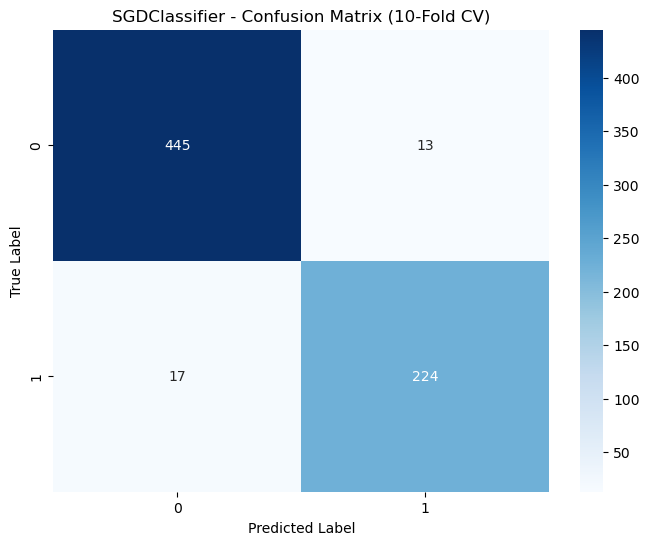

In [81]:
# Classification Report and Confusion Matrix for SGDClassifier
print("="*60)
print("SGDClassifier - Classification Report")
print("="*60)
# COMPLETE: Print classification report
print(classification_report(y, sgd_y_pred))

print("\nSGDClassifier - Confusion Matrix")
sgd_cm = confusion_matrix(y, sgd_y_pred)
print(sgd_cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
# COMPLETE: Use sns.heatmap to visualize confusion matrix
sns.heatmap(sgd_cm, annot=True, fmt='d', cmap='Blues')

plt.title('SGDClassifier - Confusion Matrix (10-Fold CV)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Gaussian Naive Bayes - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       458
           1       0.91      0.96      0.94       241

    accuracy                           0.95       699
   macro avg       0.94      0.96      0.95       699
weighted avg       0.96      0.95      0.95       699


Gaussian Naive Bayes - Confusion Matrix
[[435  23]
 [  9 232]]


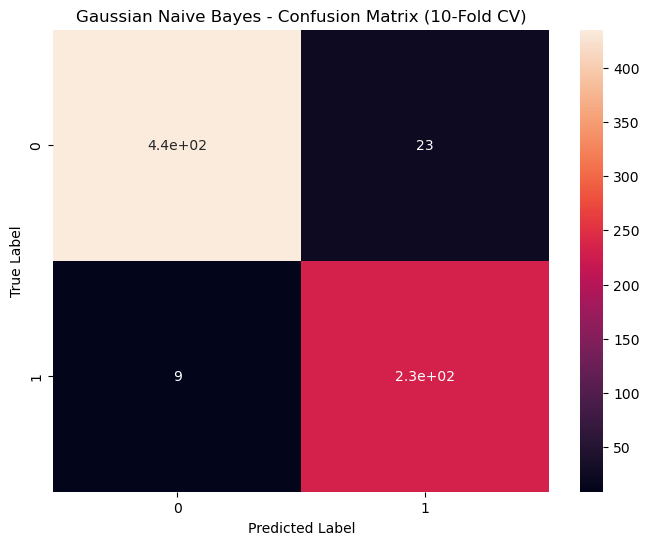

In [82]:
# Classification Report and Confusion Matrix for GaussianNB
print("="*60)
print("Gaussian Naive Bayes - Classification Report")
print("="*60)
# COMPLETE: Print classification report for Naive Bayes
print(classification_report(y, nb_y_pred))

print("\nGaussian Naive Bayes - Confusion Matrix")
nb_cm = confusion_matrix(y, nb_y_pred) # COMPLETE: confusion_matrix for Naive Bayes
print(nb_cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
# COMPLETE: Use sns.heatmap to visualize confusion matrix
sns.heatmap(nb_cm, annot=True)

plt.title('Gaussian Naive Bayes - Confusion Matrix (10-Fold CV)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Task 4d: Train on Full Training Set and Evaluate on Test Set

Now train both classifiers on the **full training set** and evaluate on the **test set**.
Compare these results with the cross-validation results from parts b) and c).

In [83]:
# COMPLETE: Train SGDClassifier on full training data
# Hint: sgd_clf.fit(X_train, y_train)

# Train SGD
sgd_clf.fit(X_train, y_train)

# Get predictions and scores for test set
sgd_test_pred = sgd_clf.predict(X_test) # COMPLETE: Use .predict(X_test)
sgd_test_scores = sgd_clf.decision_function(X_test) # COMPLETE: Use .decision_function(X_test)

# Calculate accuracy
sgd_test_accuracy = accuracy_score(y_test, sgd_test_pred)

# Calculate AUC
sgd_test_fpr, sgd_test_tpr, _ = roc_curve(y_test, sgd_test_scores)
sgd_test_auc = auc(sgd_test_fpr, sgd_test_tpr)

print(f"SGD Test Set Accuracy: {sgd_test_accuracy:.4f}")
print(f"SGD Test Set AUC: {sgd_test_auc:.4f}")

SGD Test Set Accuracy: 0.9857
SGD Test Set AUC: 0.9986


In [84]:
# COMPLETE: Train GaussianNB on full training data

# Train Naive Bayes
nb_clf.fit(X_train, y_train)

# Get predictions and scores for test set
nb_test_pred = nb_clf.predict(X_test)
nb_test_proba = nb_clf.predict_proba(X_test)
nb_test_scores = nb_test_proba[:, 1]

# Calculate accuracy
nb_test_accuracy = accuracy_score(y_test, nb_test_pred)

# Calculate AUC
nb_test_fpr, nb_test_tpr, _ = roc_curve(y_test, nb_test_scores)
nb_test_auc = auc(nb_test_fpr, nb_test_tpr)

print(f"Naive Bayes Test Set Accuracy: {nb_test_accuracy:.4f}")
print(f"Naive Bayes Test Set AUC: {nb_test_auc:.4f}")

Naive Bayes Test Set Accuracy: 0.9643
Naive Bayes Test Set AUC: 0.9908


In [85]:
# Comparison of Cross-Validation vs Test Set Results
print("="*70)
print("COMPARISON: Cross-Validation vs Test Set Performance")
print("="*70)
print(f"\nSGDClassifier:")
print(f"  CV Accuracy:   {sgd_cv_accuracy:.4f}")
print(f"  Test Accuracy: {sgd_test_accuracy:.4f}")
print(f"  Difference:    {abs(sgd_cv_accuracy - sgd_test_accuracy):.4f}")
print(f"\n  CV AUC:        {sgd_auc:.4f}")
print(f"  Test AUC:      {sgd_test_auc:.4f}")
print(f"  Difference:    {abs(sgd_auc - sgd_test_auc):.4f}")

print(f"\nGaussian Naive Bayes:")
print(f"  CV Accuracy:   {nb_cv_accuracy:.4f}")
print(f"  Test Accuracy: {nb_test_accuracy:.4f}")
print(f"  Difference:    {abs(nb_cv_accuracy - nb_test_accuracy):.4f}")
print(f"\n  CV AUC:        {nb_auc:.4f}")
print(f"  Test AUC:      {nb_test_auc:.4f}")
print(f"  Difference:    {abs(nb_auc - nb_test_auc):.4f}")
print("="*70)


COMPARISON: Cross-Validation vs Test Set Performance

SGDClassifier:
  CV Accuracy:   0.9445
  Test Accuracy: 0.9857
  Difference:    0.0412

  CV AUC:        0.9907
  Test AUC:      0.9986
  Difference:    0.0079

Gaussian Naive Bayes:
  CV Accuracy:   0.9535
  Test Accuracy: 0.9643
  Difference:    0.0108

  CV AUC:        0.9829
  Test AUC:      0.9908
  Difference:    0.0079


### Discussion Questions for Part A

**Answer the following questions in markdown cells:**

1. **Which classifier would you prefer, and why?**
   - SGD. Because SGD classifier has higher accuracy on test value.
   
2. **Is the classifier with the better AUC value also the more accurate classifier?**
   - Yes.
   
3. **Looking at the precision and recall values in the classification reports, what conclusions can you draw?**
   - SGD model is more balanced between precision and recall values, while Gaussian Naive Bayes model doesn't work very balanced.
   
4. **Are the test set values reasonably close to the cross-validation estimates? Why or why not?**
   - Yes.The value from CV and test set are close.
---

## Part B: Evaluating Performance on Two Test Datasets [1 mark]

### Background
We have two additional test datasets from different hospitals:
1. **Minnesota Hospital Dataset**
2. **Melbourne Hospital Dataset**

### Task Overview
1. Use one of the trained classifiers from Part A
2. Evaluate on both new test datasets
3. Compare results and identify differences
4. Suggest solutions if performance differs significantly
---

### Task 1: Load the Two New Test Datasets

In [86]:
# Load Minnesota hospital dataset provided in the folder ('test_dataset_minnesota').
df_minnesota = pd.read_csv("test_dataset_minnesota.csv")
df_minnesota = df_minnesota.drop("id", axis=1)

print(f"Minnesota dataset shape: {df_minnesota.shape}")
print(f"Minnesota first 5 rows:")
# COMPLETE: Display first 5 rows
print(df_minnesota.head)

Minnesota dataset shape: (200, 10)
Minnesota first 5 rows:
<bound method NDFrame.head of      thickness  size  shape  adhesion  single  nuclei  chromatin  nucleoli  \
0           10    10     10        10       6    10.0          8         1   
1            4     2      1         1       2     2.0          3         1   
2            5     1      2         1       2     1.0          3         1   
3            6     1      1         3       2     1.0          1         1   
4            8     4      4         5       4     7.0          7         8   
..         ...   ...    ...       ...     ...     ...        ...       ...   
195          5    10     10         3       8     1.0          5        10   
196          1     1      1         1       2     1.0          2         1   
197          5     7      9         8       6    10.0          8        10   
198          4     2      4         3       2     2.0          2         1   
199          1     1      2         1       3     1.0

In [87]:
# Load Melbourne hospital dataset provided in the folder ('test_dataset_melbourne').

df_melbourne = pd.read_csv("test_dataset_melbourne.csv")
df_melbourne = df_melbourne.drop("id", axis=1)

print(f"Melbourne dataset shape: {df_melbourne.shape}")
print(f"Melbourne first 5 rows:")
# COMPLETE: Display first 5 rows
print(df_melbourne.head)

Melbourne dataset shape: (200, 10)
Melbourne first 5 rows:
<bound method NDFrame.head of      thickness  size  shape  adhesion  single  nuclei  chromatin  nucleoli  \
0            3     1      1         1       2     1.0          2         1   
1            4     2      2         1       2     1.0          2         1   
2            8    10     10        10       7     5.0          4         8   
3            1     1      1         1       2     2.0          2         1   
4            3     1      1         1       2     1.0          2         1   
..         ...   ...    ...       ...     ...     ...        ...       ...   
195          4     2      1         1       2     1.0          1         1   
196         10    10     10         8       2    10.0          4         1   
197          1     1      1         1       2     1.0          3         1   
198          8     4      4         1       2     9.0          3         3   
199          1     1      1         1       2     1.0

### Task 2: Prepare Features and Target for Both Datasets

Apply the same preprocessing as the original dataset.

In [88]:
# COMPLETE: Prepare Minnesota data
# Handle missing values if any, then separate X and y
print("Number of missing value in minnesota data:")
print(df_minnesota.isnull().sum())

# COMPLETE: Clean and prepare features
X_minnesota = df_minnesota.iloc[:, :-1]
y_minnesota = df_minnesota.iloc[:, -1]

print(f"Minnesota - X shape: {X_minnesota.shape}, y shape: {y_minnesota.shape}")

Number of missing value in minnesota data:
thickness    0
size         0
shape        0
adhesion     0
single       0
nuclei       0
chromatin    0
nucleoli     0
mitosis      0
class        0
dtype: int64
Minnesota - X shape: (200, 9), y shape: (200,)


In [89]:
# COMPLETE: Prepare Melbourne data
# Handle missing values if any, then separate X and y
print("Number of missing value of melbourne data:")
print(df_melbourne.isnull().sum())

# COMPLETE: Clean and prepare features
X_melbourne = df_melbourne.iloc[:, :-1]
y_melbourne = df_melbourne.iloc[:, -1]

print(f"Melbourne - X shape: {X_melbourne.shape}, y shape: {y_melbourne.shape}")

Number of missing value of melbourne data:
thickness    0
size         0
shape        0
adhesion     0
single       0
nuclei       0
chromatin    0
nucleoli     0
mitosis      0
class        0
dtype: int64
Melbourne - X shape: (200, 9), y shape: (200,)


### Task 3: Train Model on Full Original Dataset

Train your chosen classifier (SGD or Naive Bayes) on the **complete original dataset** (combine train and test).

In [90]:
# COMPLETE: Combine original training and test data
X_full = pd.concat([X_minnesota, X_melbourne], axis=0, ignore_index=True)
y_full = pd.concat([y_minnesota, y_melbourne], axis=0, ignore_index=True)

print(f"Full dataset shape: {X_full.shape}")

# COMPLETE: Choose one classifier and train on full data
# For example, using SGDClassifier:
final_clf = SGDClassifier()
# COMPLETE: Fit on X_full, y_full
final_clf.fit(X_full, y_full)

print("✓ Model trained on full original dataset!")

Full dataset shape: (400, 9)
✓ Model trained on full original dataset!


### Task 4: Evaluate on Minnesota Dataset

In [91]:
# COMPLETE: Get predictions and scores for Minnesota dataset
# Hint: Use .predict() and .decision_function() or .predict_proba()

minnesota_pred = final_clf.predict(X_minnesota)
minnesota_scores = final_clf.decision_function(X_minnesota)

# Calculate accuracy
minnesota_accuracy = accuracy_score(y_minnesota, minnesota_pred)

# Calculate ROC curve and AUC
minnesota_fpr, minnesota_tpr, _ = roc_curve(y_minnesota, minnesota_scores)
minnesota_auc = auc(minnesota_fpr, minnesota_tpr)

print(f"Minnesota Dataset:")
print(f"  Accuracy: {minnesota_accuracy:.4f}")
print(f"  AUC: {minnesota_auc:.4f}")

Minnesota Dataset:
  Accuracy: 0.9550
  AUC: 0.9991


Minnesota Dataset - Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       139
           1       1.00      0.85      0.92        61

    accuracy                           0.95       200
   macro avg       0.97      0.93      0.94       200
weighted avg       0.96      0.95      0.95       200


Confusion Matrix:
[[139   0]
 [  9  52]]


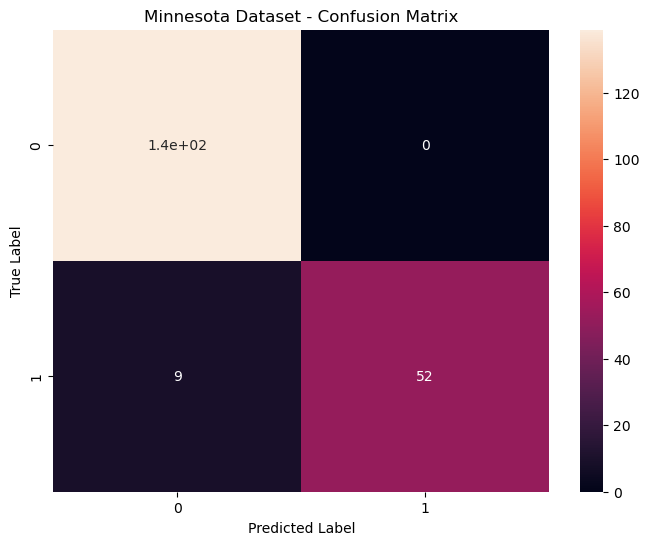

In [92]:
# COMPLETE: Classification report for Minnesota
print("Minnesota Dataset - Classification Report")
print("="*60)
# COMPLETE: Print classification report
print(classification_report(y_minnesota, minnesota_pred))

# COMPLETE: Confusion matrix
minnesota_cm = confusion_matrix(y_minnesota, minnesota_pred)
print("\nConfusion Matrix:")
print(minnesota_cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
# COMPLETE: Create heatmap for confusion matrix
sns.heatmap(minnesota_cm, annot=True)

plt.title('Minnesota Dataset - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Task 5: Evaluate on Melbourne Dataset

In [93]:
# COMPLETE: Get predictions and scores for Melbourne dataset

melbourne_pred = final_clf.predict(X_melbourne)
melbourne_scores = final_clf.decision_function(X_melbourne) # COMPLETE: Get decision scores or probabilities

# Calculate accuracy
melbourne_accuracy = accuracy_score(y_melbourne, melbourne_pred)

# Calculate ROC curve and AUC
melbourne_fpr, melbourne_tpr, _ = roc_curve(y_melbourne, melbourne_scores)
melbourne_auc = auc(melbourne_fpr, melbourne_tpr)

print(f"Melbourne Dataset:")
print(f"  Accuracy: {melbourne_accuracy:.4f}")
print(f"  AUC: {melbourne_auc:.4f}")

Melbourne Dataset:
  Accuracy: 0.9900
  AUC: 0.9995


Melbourne Dataset - Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       145
           1       0.96      1.00      0.98        55

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200


Confusion Matrix:
[[143   2]
 [  0  55]]


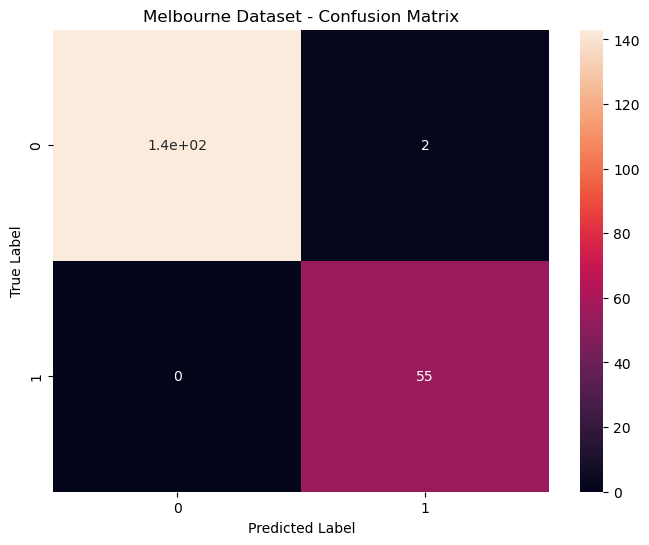

In [94]:
# COMPLETE: Classification report for Melbourne
print("Melbourne Dataset - Classification Report")
print("="*60)
print(classification_report(y_melbourne, melbourne_pred))

# COMPLETE: Confusion matrix
melbourne_cm = confusion_matrix(y_melbourne, melbourne_pred) 
print("\nConfusion Matrix:")
print(melbourne_cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(melbourne_cm, annot=True)

plt.title('Melbourne Dataset - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Task 6: Compare ROC Curves for Both New Datasets

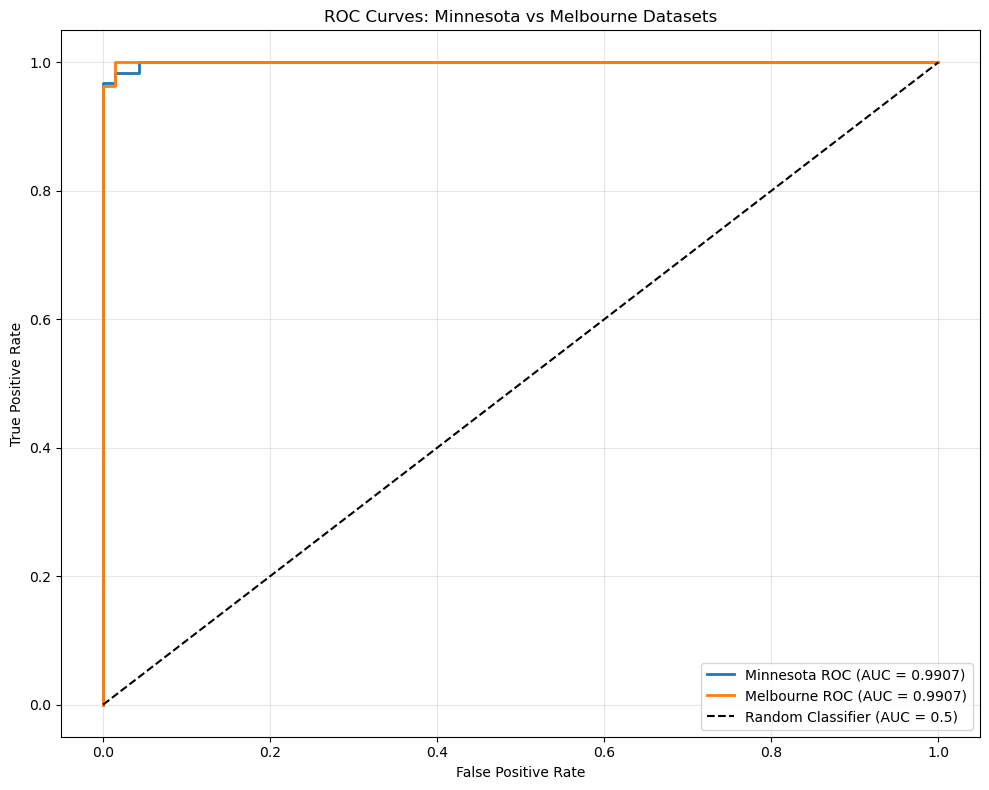

In [95]:
# COMPLETE: Plot ROC curves for both new datasets

plt.figure(figsize=(10, 8))

plt.plot(minnesota_fpr, minnesota_tpr, label=f'Minnesota ROC (AUC = {sgd_auc:.4f})', linewidth=2)
plt.plot(melbourne_fpr, melbourne_tpr, label=f'Melbourne ROC (AUC = {sgd_auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Minnesota vs Melbourne Datasets')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [96]:
print("="*70)
print("PERFORMANCE COMPARISON ACROSS DATASETS")
print("="*70)
print(f"Original Test Set:")
print(f"  Accuracy: {sgd_test_accuracy:.4f}")  # Or nb_test_accuracy if using NB
print(f"  AUC:      {sgd_test_auc:.4f}")

print(f"\nMinnesota Dataset:")
print(f"  Accuracy: {minnesota_accuracy:.4f}")
print(f"  AUC:      {minnesota_auc:.4f}")

print(f"\nMelbourne Dataset:")
print(f"  Accuracy: {melbourne_accuracy:.4f}")
print(f"  AUC:      {melbourne_auc:.4f}")
print("="*70)

PERFORMANCE COMPARISON ACROSS DATASETS
Original Test Set:
  Accuracy: 0.9857
  AUC:      0.9986

Minnesota Dataset:
  Accuracy: 0.9550
  AUC:      0.9991

Melbourne Dataset:
  Accuracy: 0.9900
  AUC:      0.9995


## Discussion Questions for Part B

**Answer the following questions:**

1. **Do the Minnesota and Melbourne datasets give similar results to the original test set?**
   - Minnesota has similar results to original test set. Melbourne doesn't have.

2. **If results differ, provide plausible reasons why (Hint: look at the dataset names/sources)**
   - Two dataset are collected from different area and may from different time period.

3. **What could we do to improve performance if the model doesn't generalize well?**
   - Hint: Consider:
     - Feature selection (simpler models)
     - Regularization
     - Collecting more diverse training data
     - Domain adaptation techniques
   - Find more data to train the model. Or check the correlation between attributes and delete some attributes with high correlation.

4. **If collecting more data is not an option, what alternatives exist?**
   - Hint: Look at chapters 3 and 4 of your textbook
   - Consider: regularization parameters (alpha for Ridge/Lasso, penalty for SGD)
   - Adjust alpha in SGDClassifier to improve performance.

5. **Optional Challenge: Did you try creating a simpler model with fewer features or stronger regularization? What were the results?**
   - [Your answer here]

## Submission Checklist

Before submitting, make sure you have:
- [ ] Filled in your name and student ID (and partner's if applicable)
- [ ] Completed all COMPLETE sections in the code
- [ ] Run all code cells successfully
- [ ] Generated all required plots (ROC curves, confusion matrices)
- [ ] Answered all discussion questions in markdown cells
- [ ] Verified all outputs are visible and correct
- [ ] Used your student ID as random_state where required
- [ ] Converted notebook to HTML
- [ ] Checked that the HTML displays all outputs correctly
- [ ] Submitted the HTML file to Canvas before the deadline

**Remember:** If working in pairs, both students must submit the same HTML!

## Additional Notes

### Key Concepts to Understand:
- **ROC Curve**: Shows trade-off between true positive rate and false positive rate
- **AUC**: Overall measure of classifier performance (0.5 = random, 1.0 = perfect)
- **Cross-Validation**: Provides more reliable performance estimates
- **Generalization**: Model's ability to perform well on unseen data
- **Domain Shift**: When test data comes from different distribution than training data

### Common Pitfalls to Avoid:
- Forgetting to use random_state in classifiers and splits
- Using wrong column for predict_proba (remember to use [:, 1])
- Not handling missing values before evaluation
- Comparing classifiers without considering multiple metrics

**Good luck!**